In [1]:
import pickle
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

In [2]:
# Load model and dictionary of woes

filename = 'Output_final_models/best_6_external.sav'
loaded_model = pickle.load(open(filename, 'rb'))

f = open('Dic_woes_sorted/best.txt','r')
dic_best = eval(f.read())
f.close()

In [3]:
# %load load_list_var.py
def load_vars(type):

    if type == "numerical":

        vars = []
        with open("Data/num_var.txt", "r") as f:
            for line in f:
                vars.append(str(line.strip()))

    elif type == "categorical":

        vars = []
        with open("Data/cat_var.txt", "r") as f:
            for line in f:
                vars.append(str(line.strip()))

    else:

        print("Not properly loaded var, type is {}".format(type))

    return vars


In [4]:
variables = [*load_vars('numerical'), *load_vars('categorical')]
variables.remove('CODE_GENDER')

In [5]:
training_data = pd.read_csv('Output_xgboost_binning/Training_with_woe_on_numerical_6.csv.gz', compression='gzip')

In [6]:
f = open('Output_CV/best_monotonicity.txt','r')
restriction = eval(f.read())
f.close()

In [7]:
for var in load_vars('categorical'):
    restriction[var] = 1

In [8]:
violations = {}
for var in variables:
    violations[var] = violations_positive(loaded_model,dic_best[var], training_data, variables, var )

NameError: name 'violations_positive' is not defined

In [80]:
for var in variables:
    print(np.sum(list(violations[var].values())))

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [9]:
data_woe = pd.read_csv('Output_xgboost_unrestricted/Training_unrestricted_woe.csv.gz', compression='gzip')
data     = pd.read_csv('Output_preprocessing/Training_set_woe_cat.csv.gz', compression='gzip')

f = open('Dics_bin_woe/dic_unrestricted.txt','r')
dic_un = eval(f.read())
f.close()

f = open('dict_categoricals_to_woe.txt','r')
dic_categoricals = eval(f.read())
f.close()

filename = 'Output_final_models/best_6_external.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [59]:
both = fancy_plot(variables[3], data_woe, data)

unzipped_object = zip(*both)
unzipped_list   = list(unzipped_object)

bins = unzipped_list[0]
woes = unzipped_list[1]

In [56]:
for var in variables:
    violations = violations_positive(loaded_model, woes, data_woe, variables, var)
    print(np.sum(list(violations.values())))

0
0
0
21070
4605
0
62156
0
0
0
24155
0
0
0
0
10877
2974
3331
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
50252
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1476
0
0
0
0
0
0
9145
0
0
0
0
0
0
0
0
0
0
0
0
0
7872
0
0
0
0
0
0
0
0
0
0
0
0
0
0
28137
0
12935
0
0
0
0
0
0
0
0
0
0
5679
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [57]:
for var in variables:
    violations = violations_negative(loaded_model, woes, data_woe, variables, var)
    print(np.sum(list(violations.values())))

0
0
0
381714
457072
0
320233
445113
299348
0
320254
0
0
0
0
308731
635898
662140
0
0
0
0
0
0
0
46844
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
206217
0
0
0
0
0
0
266538
0
0
0
0
0
273060
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
327875
0
317470
0
0
0
0
186163
0
328727
0
0
0
22190
0
0
220356
116258
277097
16359
49860
15864
0
0
8925
0
340609
0
455255
0
0
0
0
0
0
0
0
0
0
0
263076
277522
0
0
53120
0
0
269456
0
0
0
0
305934
0
0
452672
0
357697
0
0
0
0
0
0
0
0
0
0
31977
0
165484
0
0
0
149727
0
0
0
354810
351384
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
420784
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [64]:
vios = violations_positive(loaded_model, woes, data_woe, variables, variables[3])

In [76]:
list(vios.values())

[8737, 3596, 3063, 3596, 3063, 3596, 8737]

In [69]:
bins

(16407.0, 26505.0, 26649.0, 31086.0, 31635.0, 43713.0, 258025.5)

In [62]:
woes

(-2.5797222107856594,
 -2.3478191190841486,
 -1.4877898504113445,
 -2.306988949401871,
 -1.874595474807204,
 -2.410845552268079,
 -2.755970601173933)

In [86]:
num_violations = list(vios.values())

In [97]:
bins_0 = [0,*bins]

In [100]:
bins_1 = ['[- , {}]'.format(bins[0])]
for idx in range(1,len(bins)):
    string =  '[{} , {}]'.format(bins[idx-1], bins[idx])
    bins_1.append(string)

In [107]:
variables[3]

'AMT_ANNUITY_x'

In [10]:
def fancy_plot_parameters(variable, data_woe, data):
    
    #dic = {k: v for k, v in sorted(dic.items(), key=lambda item: item[1])}
    
    xlabels = []
    bars    = []
    woes    = []
    maxs    = []
    
    woes_up = list(data_woe[variable].value_counts().index)
    for woe in woes_up:
        
        max_d = data[np.abs(data_woe[variable] - woe) < 0.0001][variable].max() #max
        if ~np.isfinite(max_d):
            continue
        maxs.append(max_d)
        woes.append(woe)
    both = zip(maxs,woes)
    both = sorted(both, key= lambda item: item[0])
    maxs = np.array(maxs)
    maxs_au = maxs[~np.isnan(maxs)]

    try:
        do = maxs_au[0] > maxs_au[1]
    except IndexError: 
        do = False
    
    if do:
        reverse = lambda x: x[::-1]
        
        xlabels = reverse(xlabels)
        bars    = reverse(bars)
        woes    = reverse(woes)
        
        
    return xlabels, bars, woes, both

def fancy_plot (variable, data_woe, data, save = False, name = None):
    
    xlabels, bars, woes, both = fancy_plot_parameters(variable, data_woe, data)
    return both

In [11]:
def violations_positive(model, woes, training_data, variables, variable):
    pred_ini = model.predict_proba(training_data[variables])[:,1]
    violations = {}
    place = 0
    for woe in woes:
        vio = 0
        up = []
        
        data = training_data.copy()
        data.loc[:, variable] = woe
        pred = model.predict_proba(data[variables])[:,1]
        
        
        for elem in training_data[variable]:
            control = False
            for wo in woes[place:]:
                if np.abs(elem-wo) < 0.001:
                    control = True
            
            up.append(control)
        up = np.array(up)
        place += 1
        vio = np.sum(pred[up] > pred_ini[up])
        vio += np.sum(pred[~up] < pred_ini[~up])
        
        violations[woe] = vio
    
    return violations

def violations_negative(model, woes, training_data, variables, variable):
    pred_ini = model.predict_proba(training_data[variables])[:,1]
    violations = {}
    place = 0
    for woe in woes:
        vio = 0
        up = []
        data = training_data.copy()
        data.loc[:, variable] = woe
        pred = model.predict_proba(data[variables])[:,1]
        
        for elem in training_data[variable]:
            control = False
            for wo in woes[place:]:
                if np.abs(elem-wo) < 0.001:
                    control = True
            
            up.append(control)
        up = np.array(up)
        place += 1
        
        vio = np.sum(pred[up] < pred_ini[up])
        vio += np.sum(pred[~up] > pred_ini[~up])
        
        violations[woe] = vio
    
    return violations

In [12]:

def plot_violations(loaded_model, data_woe, data, variables, variable, sign):

    both = fancy_plot(variable, data_woe, data)

    unzipped_object = zip(*both)
    unzipped_list   = list(unzipped_object)

    bins = unzipped_list[0]
    woes = unzipped_list[1]

    if np.abs(sign - 1) < 0.1:
        vios           = violations_positive(loaded_model, woes, data_woe, variables, variable)

    if np.abs(sign + 1) < 0.1:
        vios           = violations_negative(loaded_model, woes, data_woe, variables, variable)

    num_violations = list(vios.values())
    num_violations.append(np.sum(num_violations))

    bins_1 = ['[- , {}]'.format(bins[0])]
    for idx in range(1,len(bins)):
        string =  '[{} , {}]'.format(bins[idx-1], bins[idx])
        bins_1.append(string)
    bins_1.append('Total')
    
    fig,ax=plt.subplots()

    plt.style.use('fivethirtyeight')

    ax.bar(bins_1, num_violations ,color="blue")
    #plt.plot([0, len(bins_1)], [data_woe.shape[0], data_woe.shape[0]], color='k', linestyle='-', linewidth=2)

    ax2=ax.twinx()

    plt.style.use('default')

    ax2.plot(bins_1[:-1], woes, marker="o",color = "red")

    ax.set_xticklabels(bins_1, rotation = 90)
    ax.set_xlabel('Set')
    ax.set_ylabel('Number of samples')
    ax2.set_ylabel('WoE')
    
    

    plt.show()

In [15]:
data_woe = pd.read_csv('Output_xgboost_unrestricted/Training_unrestricted_woe.csv.gz', compression='gzip')
data     = pd.read_csv('Output_preprocessing/Training_set_woe_cat.csv.gz', compression='gzip')

f = open('Dics_bin_woe/dic_best.txt','r')
dic_un = eval(f.read())
f.close()

f = open('dict_categoricals_to_woe.txt','r')
dic_categoricals = eval(f.read())
f.close()

#filename = 'Output_CV/unrestricted.sav'
filename = 'Output_final_models/best_6_external.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [19]:
search = 'da'

for var in variables:
    if search in var.lower():
        print(var)

DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
LANDAREA_AVG
LANDAREA_MODE
LANDAREA_MEDI
DAYS_LAST_PHONE_CHANGE
AMT_REQ_CREDIT_BUREAU_DAY
DAYS_CREDIT
CREDIT_DAY_OVERDUE
DAYS_CREDIT_ENDDATE
DAYS_ENDDATE_FACT
DAYS_CREDIT_UPDATE
NFLAG_LAST_APPL_IN_DAY
DAYS_DECISION
DAYS_FIRST_DRAWING
DAYS_FIRST_DUE
DAYS_LAST_DUE_1ST_VERSION
DAYS_LAST_DUE
DAYS_TERMINATION
DAYS_INSTALMENT
DAYS_ENTRY_PAYMENT
WEEKDAY_APPR_PROCESS_START


In [20]:
variable = 'DAYS_BIRTH'

<ipython-input-12-7dd3438b75fb>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(bins_1, rotation = 90)


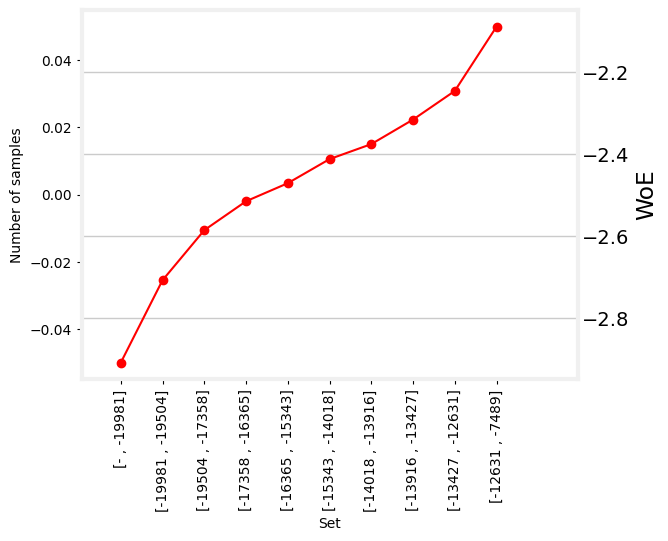

<ipython-input-12-7dd3438b75fb>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(bins_1, rotation = 90)


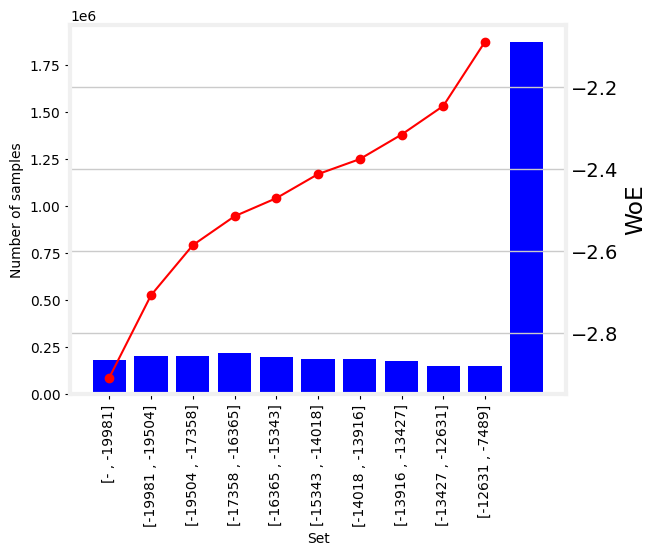

In [21]:
monotonies = [1, -1]

for mono in monotonies:
    plot_violations(loaded_model, data_woe, data, variables, variable, mono)

In [90]:
sorted(dic_best['REGION_POPULATION_RELATIVE'])

[-3.186445487984194,
 -2.956143071464368,
 -2.6849760164894874,
 -2.4932434561311814,
 -2.4454344682375826,
 -2.3445920092913486,
 -2.031129495383809]

In [98]:
dic_best['EXT_SOURCE_3']

[-1.4704929945351057,
 -1.9406519604758383,
 -2.111341090684844,
 -2.248046219037401,
 -2.2801850139668667,
 -2.3885380035468695,
 -2.4840729690394228,
 -2.6337878563441732,
 -3.0869815534276457]

In [102]:
violations_positive(loaded_model,dic_best['AMT_ANNUITY_x'], training_data, variables, 'AMT_ANNUITY_x' )

{-2.390417337035161: 1572,
 -2.54212921348203: 11414,
 -2.589796466449139: 11414,
 -2.686043437078678: 11414,
 -3.3571957342245207: 11414}

In [96]:
violations_negative(loaded_model,dic_best['EXT_SOURCE_3'], training_data, variables, 'EXT_SOURCE_3' )

{-1.4704929945351057: 220605,
 -1.9406519604758383: 227986,
 -2.111341090684844: 227986,
 -2.248046219037401: 227958,
 -2.2801850139668667: 115486,
 -2.3885380035468695: 115486,
 -2.4840729690394228: 115486,
 -2.6337878563441732: 115486,
 -3.0869815534276457: 92047}

In [60]:
pred_ini = loaded_model.predict_proba(training_data[variables])[:,1]
variable = 'EXT_SOURCE_3'
violations = {}
for woe in dic_best['EXT_SOURCE_3']:
    vio = 0

    data = training_data.copy()
    data.loc[:, variable] = woe
    pred = loaded_model.predict_proba(data[variables])[:,1]

    up = training_data[variable] > woe

    vio = np.sum(pred[up] > pred_ini[up])
    vio += np.sum(pred[~up] < pred_ini[~up])
    
    

    violations[woe] = vio

In [64]:
training_data[variable]

0        -2.344592
1        -2.344592
2        -2.344592
3        -2.344592
4        -2.344592
            ...   
246003   -2.684976
246004   -2.344592
246005   -2.445434
246006   -2.344592
246007   -2.344592
Name: REGION_POPULATION_RELATIVE, Length: 246008, dtype: float64

In [61]:
pred_ini

array([0.21161632, 0.04060511, 0.022132  , ..., 0.00783554, 0.01836692,
       0.02464505], dtype=float32)

In [65]:
pred

array([0.21161632, 0.04060511, 0.022132  , ..., 0.00783554, 0.01836692,
       0.02464505], dtype=float32)

In [63]:
up

0         True
1         True
2         True
3         True
4         True
          ... 
246003    True
246004    True
246005    True
246006    True
246007    True
Name: REGION_POPULATION_RELATIVE, Length: 246008, dtype: bool

In [18]:
dic_best['CNT_CHILDREN']

[-2.485938654611713, -2.3162592895082765]

In [19]:
200 * 10 * 100000

200000000

In [20]:
list(range(1,10))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [31]:
boo = training_data['CNT_CHILDREN'] > -1

In [32]:
pred = loaded_model.predict_proba(training_data[variables])[:,1]

In [34]:
pred[~boo]

array([0.21161632, 0.04060511, 0.022132  , ..., 0.00783554, 0.01836692,
       0.02464505], dtype=float32)